## Imports

In [40]:
import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [5]:
from validate_sample_submission import validate_submission

## Load data

In [6]:
df_ratings = pd.read_csv('BookRatings.csv')
df_users = pd.read_csv('BooksUsers.csv')
# df_books = pd.read_csv('BooksMetaInfo.csv')
df_test = pd.read_csv('test_users.csv')

In [7]:
test_users = df_test.values.ravel().tolist()

## Non-personalised recommendations

In [5]:
def pick_10_best(df_ratings):
    '''Returns 10 ISBN numbers according to the following criteria:
    - rated at least 80 times
    - ranked according to average rating
    '''
    
    # create ratings matrix
    ratings_frame = df_ratings.set_index(['User-ID', 'ISBN']).unstack() # this is slow
    ratings_frame.index.name = None
    
    # summarize
    books_summary = pd.DataFrame(index=ratings_frame.columns)
    books_summary['mean_rating'] = ratings_frame.mean(skipna=True)
    books_summary['n_ratings'] = ratings_frame.count()
    books_summary['highest_rating'] = ratings_frame.max()
    books_summary['lowest_rating'] = ratings_frame.min()

    # select
    top_10 = books_summary[books_summary.n_ratings>=80]\
                    .sort_values('mean_rating', ascending=False)\
                    .head(10)\
                    .index.get_level_values('ISBN').tolist()
    return top_10

In [7]:
top_10 = pick_10_best(df_ratings)

In [8]:
def generate_non_personalized_submission(top_10, test_users):
    
    # sizes
    n_users = len(test_users)
    n_books = 10
    
    # output
    recs = pd.DataFrame()
    recs['User-ID'] = [user for user in test_users for book in range(n_books)]
    recs['ISBN'] = top_10*n_users
    
    return recs

In [10]:
recs = generate_non_personalized_submission(top_10, test_users)

if validate_submission(recs):
    recs.to_csv('non_pers_submission.csv')

## Visualize ratings

In [9]:
ratings_frame = df_ratings.set_index(['User-ID', 'ISBN']).unstack() # this is slow
ratings_frame.index.name = None
    
# summarize
books_summary = pd.DataFrame(index=ratings_frame.columns)
books_summary['mean_rating'] = ratings_frame.mean(skipna=True)
books_summary['n_ratings'] = ratings_frame.count()
books_summary['highest_rating'] = ratings_frame.max()
books_summary['lowest_rating'] = ratings_frame.min()

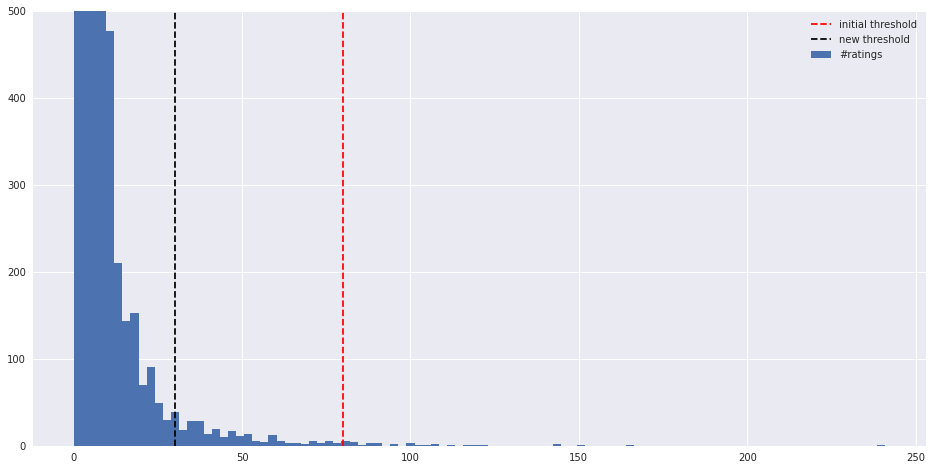

In [46]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

ax.hist(books_summary.n_ratings, bins=100, range=(0, books_summary.n_ratings.max()), label='#ratings')
ax.axvline(80, linestyle='--', color='r', label='initial threshold', )
ax.axvline(30, linestyle='--', color='k', label='new threshold')
ax.set_ylim([0,500])
ax.legend()

plt.show()


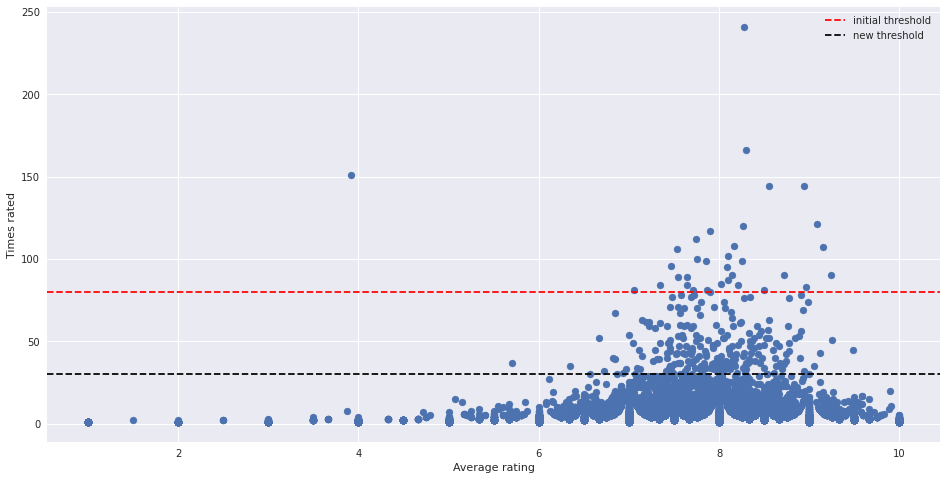

In [58]:
fig, ax = plt.subplots(1,1, figsize=(16,8))

ax.scatter(books_summary.mean_rating, books_summary.n_ratings, marker='o')
ax.axhline(80, linestyle='--', color='r', label='initial threshold')
ax.axhline(30, linestyle='--', color='k', label='new threshold')
ax.set_xlabel('Average rating')
ax.set_ylabel('Times rated')
ax.legend()

plt.show()